In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.19.0'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=[0.8, 1.2],
    brightness_range=[0.75, 1.5],
    horizontal_flip=True,
    fill_mode='nearest'
)


In [5]:
training_set = train_datagen.flow_from_directory('dataset/Train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 906 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
test_set = test_datagen.flow_from_directory('dataset/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 100 images belonging to 2 classes.


In [8]:
cnn = tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

c:\Users\hatkr\Desktop\Projects\my_projects\mask dedector\maskEnv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [15]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

c:\Users\hatkr\Desktop\Projects\my_projects\mask dedector\maskEnv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.6587 - loss: 0.6089 - val_accuracy: 0.9000 - val_loss: 0.3421
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.7965 - loss: 0.4666 - val_accuracy: 0.8900 - val_loss: 0.2330
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.8011 - loss: 0.4683 - val_accuracy: 0.9400 - val_loss: 0.2441
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.8131 - loss: 0.4277 - val_accuracy: 0.9100 - val_loss: 0.2345
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - accuracy: 0.8512 - loss: 0.3606 - val_accuracy: 0.9400 - val_loss: 0.2269
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.7931 - loss: 0.4237 - val_accuracy: 0.9200 - val_loss: 0.2133
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.8432 - loss: 0.3722 - val_accuracy: 0.9200 - val_loss: 0.2095
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.8551 - loss: 0.3453 - val_accuracy: 0.

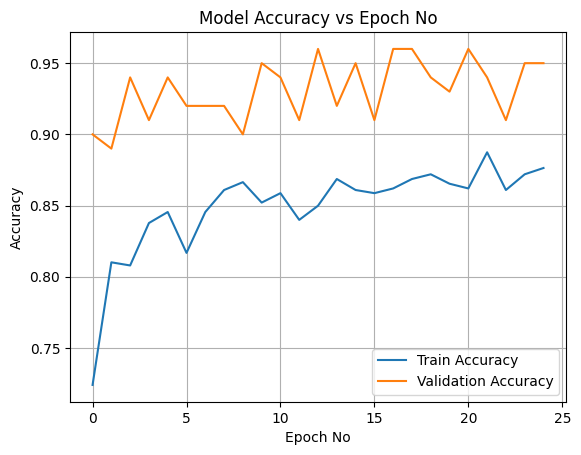

In [17]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy vs Epoch No')
plt.ylabel('Accuracy')
plt.xlabel('Epoch No')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [18]:
print(training_set.class_indices)

{'Mask': 0, 'Non Mask': 1}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


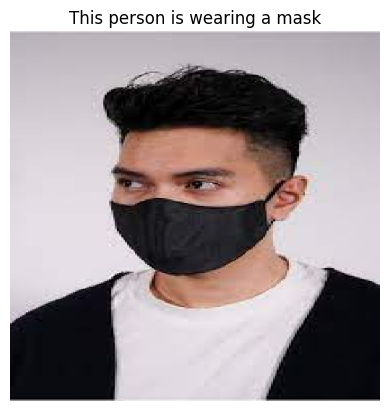

In [19]:
from tensorflow.keras.preprocessing import image
validation_img = image.load_img("dataset/Validation/mask_or_no_mask.jpg" , target_size=(64,64))
show_img = image.load_img("dataset/Validation/mask_or_no_mask.jpg" , target_size=(512,512))


validation_img = image.img_to_array(validation_img)
validation_img = np.expand_dims(validation_img,axis=0)
prediction_encoded = cnn.predict(validation_img)
probablity = prediction_encoded[0][0]
if probablity < 0.5:
    prediction = 'Mask'
else:
    prediction='No Mask'
    
if prediction=='Mask':
    title = "This person is wearing a mask"
else:
    title = "This person is not wearing a mask"

plt.imshow(show_img)
plt.axis('off') 
plt.title(title)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


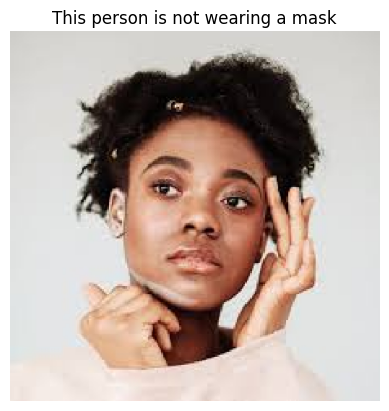

In [20]:
validation_img_2 = image.load_img("dataset/Validation/mask_or_no_mask_2.jpg" , target_size=(64,64))
show_img = image.load_img("dataset/Validation/mask_or_no_mask_2.jpg" , target_size=(512,512))
validation_img_2 = image.img_to_array(validation_img_2)
validation_img_2 = np.expand_dims(validation_img_2,axis=0)
prediction_encoded = cnn.predict(validation_img_2)
probablity = prediction_encoded[0][0]
if probablity < 0.5:
    prediction = 'Mask'
else:
    prediction='No Mask'
    
if prediction=='Mask':
    title = "This person is wearing a mask"
else:
    title = "This person is not wearing a mask"

plt.imshow(show_img)
plt.axis('off') 
plt.title(title)
plt.show()    

In [22]:
cnn.save('mask_classifier.keras')
